# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb). The dataset is found on [Kagle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). The dataset contains 21 features and 10866 record.

#### Features/Columns
| **Feature**                | **Description**                                                                    |
|:----------------------------|:----------------------------------------------------------------------------------|
| **id**                     | Unique identifier for the movie in the dataset.                                    |
| **imdb_id**                | Unique identifier for the movie on IMDb.                                           |
| **popularity**             | Popularity score of the movie, possibly derived from audience ratings, views, or engagement metrics.|
| **budget**                 | The budget of the movie in US dollars (as an integer, without adjustment for inflation).                 |
| **revenue**                | The revenue generated by the movie in US dollars (as an integer, without adjustment for inflation).      |
| **original_title**         | The original title of the movie.                                                                         |
| **cast**                   | The main cast of the movie, with names separated by a delimiter (e.g., `|`).                             |
| **homepage**               | The URL of the official homepage of the movie (if available).                                            |
| **director**               | The name of the director of the movie.                                                                   |
| **tagline**                | A tagline or promotional slogan associated with the movie.                                               |
| **keywords**               | Keywords or phrases describing the themes, events, or significant elements in the movie.                 |
| **overview**               | A brief summary or description of the movie plot.                                                       |
| **runtime**                | The runtime of the movie in minutes.                                                                     |
| **genres**                 | The genres of the movie, with multiple genres separated by a delimiter (e.g., `\|`).                      |
| **production_companies**   | The production companies involved in creating the movie, separated by a delimiter (e.g., `\|`).           |
| **release_date**           | The release date of the movie, formatted as a string.                                 |
| **vote_count**             | The number of votes the movie received on a rating platform.                                             |
| **vote_average**           | The average rating of the movie based on user votes, typically on a scale of 1 to 10.                    |
| **release_year**           | The year the movie was released.                                                                         |
| **budget_adj**             | The budget of the movie adjusted for inflation to account for changes in the value of money over time.    |
| **revenue_adj**            | The revenue of the movie adjusted for inflation.                                                         |


### Question(s) for Analysis
### Question 1: What factors influence the popularity of a movie.
### Question 2: Which genres have the highest revenue.

In [4]:
#importing necessary packages.
import pandas as pd 
import numpy as np
import zipfile
%matplotlib inline
pd.set_option('display.max_columns', None) 

<a id='wrangling'></a>
## Data Wrangling

In [5]:
with zipfile.ZipFile("tmdb-movies.zip",'r') as zip_ref:
    zip_ref.extractall()
# Load the dataset.
df = pd.read_csv(filepath_or_buffer='tmdb-movies.csv')
# printing the shape of the dataset.
print(df.shape,'\n')
# Displaying the top 5 rows.
df.head()

(10866, 21) 



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Displaying the buttom 5 rows.
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
# Displating information about the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# Displaying some statistics of each column.
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,9373,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,8804,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,134,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [9]:
# Displaying the number of missing values in each column.
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Displying number of rows that have missing values.
df.isna().any(axis=1).sum()

np.int64(8874)

In [11]:
# Displaying the columns that have missing values.
list(df.columns[df.isna().any()].values)

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

#### There are 9 columns with missing values:

| **Column**             | **Number of Missing Values** |
|:-------------------------|:-------------------------------|
| imdb_id                | 10                            |
| cast                   | 76                            |
| homepage               | 7930                          |
| director               | 44                            |
| tagline                | 2824                          |
| keywords               | 1493                          |
| overview               | 4                             |
| genres                 | 23                            |
| production_companies   | 1030                          |




### Data Cleaning

#### Step 1
Droping columns that are not necessary for the analysis and contain missing values. Columns like **imdb_id**, **homepage**, **tagline** and **overview** will not be used in answring the questions so we will drop them.


In [12]:
df.drop(['imdb_id','homepage','tagline','overview'],axis=1, inplace=True)

In [13]:
# Displaying number of rows that have missing values.
df.isna().any(axis=1).sum()

np.int64(2199)

By droping these columns we reduced the number of row that have missing values from 8874 to 2199.

In [14]:
# Displaying the number of missing values in each column
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### step 2
Droping rows that contian null values in useful features. For our analysis the cast, director and genres are usfull columns. These columns contian some null values. We will simply drop them since we can replace their values unless we have extra data that contain them.

In [15]:
df.dropna(subset=['cast','director','genres'], inplace=True)
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Step 3
Now that we have no null values in the genres column we can split the values. Each record in the genres column have multiple genres separated by |. We will extract these values and create a new record for each to make it ready for the analysis.

In [16]:
df['genres'] = df['genres'].str.split('|') # Split the values into a list
df = df.explode('genres')
df[['genres']].head(10)

,genres
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action
1,Adventure
1,Science Fiction
1,Thriller
2,Adventure
2,Science Fiction


In [17]:
# Checking the dataframe shape after the explode operation.
df.shape

(26758, 17)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26758 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26758 non-null  int64  
 1   popularity            26758 non-null  float64
 2   budget                26758 non-null  int64  
 3   revenue               26758 non-null  int64  
 4   original_title        26758 non-null  object 
 5   cast                  26758 non-null  object 
 6   director              26758 non-null  object 
 7   keywords              23528 non-null  object 
 8   runtime               26758 non-null  int64  
 9   genres                26758 non-null  object 
 10  production_companies  24655 non-null  object 
 11  release_date          26758 non-null  object 
 12  vote_count            26758 non-null  int64  
 13  vote_average          26758 non-null  float64
 14  release_year          26758 non-null  int64  
 15  budget_adj            26

#### Step 4
Replacing inconsistent values in some of the columns. Runing describe on 'budget','revenue','budget_adj','revenue_adj' to get some statistics.

In [19]:
columns = ['budget','revenue','budget_adj','revenue_adj']
df[columns].describe()

,budget,revenue,budget_adj,revenue_adj
count,2.675800e+04,2.675800e+04,2.675800e+04,2.675800e+04
mean,1.763896e+07,4.779010e+07,2.119617e+07,6.133530e+07
std,3.470444e+07,1.326337e+08,3.829881e+07,1.620401e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.500000e+04,0.000000e+00,3.784891e+04,0.000000e+00
75%,2.000000e+07,3.132790e+07,2.734338e+07,4.441365e+07
max,4.250000e+08,2.781506e+09,4.250000e+08,2.827124e+09


We can see that in these 4 columns the values of the **25%** and **50%** (median) are all zero. This mean that half the data in these columns are zero which does not make any since so we need to deal with these values before the analysis. </br> We can see the count of zeros in each column below

In [20]:
print(df.shape)
# Get the number of zeros in each column
(df[columns]==0).sum()

(26758, 17)


budget         13183
revenue        14103
budget_adj     13183
revenue_adj    14103
dtype: int64

Now we will replace these values. Since these values are numericall we will use the median or the mean. Since the median is zero in all of these column our only choice is the mean.

In [21]:
# Get the mean of each column.
df[columns].mean()

budget         1.763896e+07
revenue        4.779010e+07
budget_adj     2.119617e+07
revenue_adj    6.133530e+07
dtype: float64

In [22]:
# Replacing the zeros with the mean.
df[columns] = df[columns].apply(lambda x: x.replace(0, x.mean()))

In [23]:
# Get the number of zeros in each column
(df[columns]==0).sum()

budget         0
revenue        0
budget_adj     0
revenue_adj    0
dtype: int64

In [24]:
df[columns].describe()

,budget,revenue,budget_adj,revenue_adj
count,2.675800e+04,2.675800e+04,2.675800e+04,2.675800e+04
mean,2.632924e+07,7.297823e+07,3.163900e+07,9.366252e+07
std,3.123430e+07,1.255128e+08,3.371032e+07,1.524107e+08
min,1.000000e+00,2.000000e+00,9.210911e-01,2.370705e+00
25%,1.763896e+07,4.061694e+07,2.119617e+07,5.878518e+07
50%,1.763896e+07,4.779010e+07,2.119617e+07,6.133530e+07
75%,2.000000e+07,4.779010e+07,2.734338e+07,6.133530e+07
max,4.250000e+08,2.781506e+09,4.250000e+08,2.827124e+09


 ***Now we are ready to explore the data.***

<a id='eda'></a>
## Exploratory Data Analysis
### Question 1: What factors influence the popularity of a movie.

To understand the movie popularity we will calculate some statistics on the feature.
- First we will calculate the mean , median, standard  deviation and quartile.

In [25]:
df['popularity'].mean()

np.float64(0.7102231040062783)

In [26]:
df['popularity'].median()

np.float64(0.414316)

In [27]:
df['popularity'].std()

np.float64(1.1179900368890179)

In [28]:
df['popularity'].quantile([0.25,0.5,0.75]) 

0.25    0.226614
0.50    0.414316
0.75    0.779581
Name: popularity, dtype: float64

- We can see that the average of the popularity is 0.71 with a standard deviation of 1.11 so the data is relatively sepread.
- The median is 0.41.
- The first quartile is 0.23, the second is 0.41 (median), the third is 0.77.

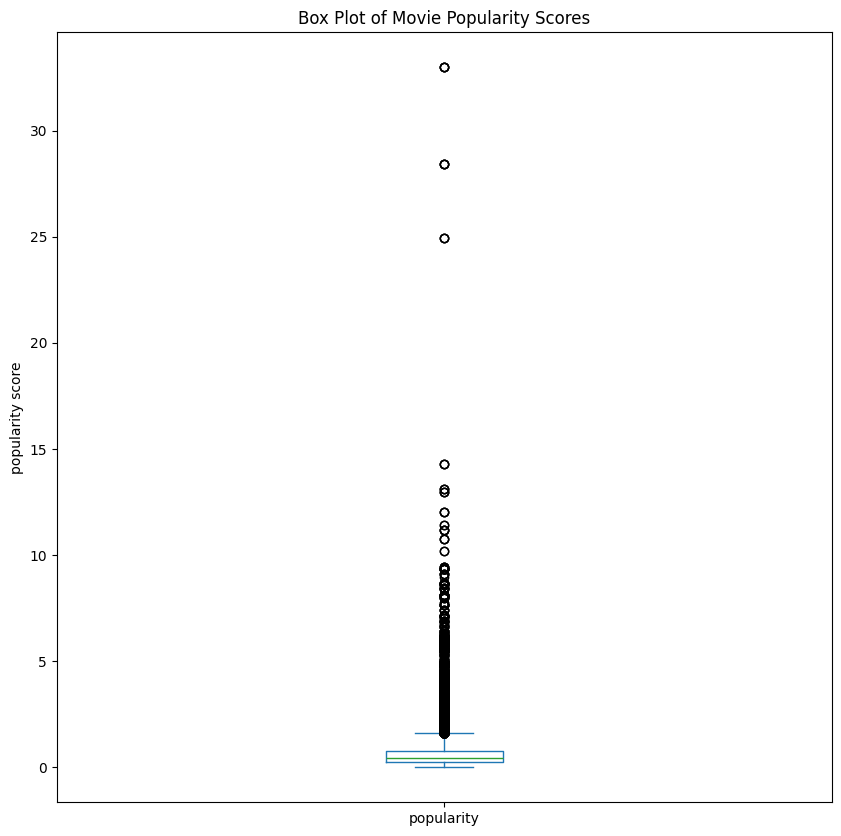

In [29]:
df['popularity'].plot(figsize=(10,10),kind='box', title='Box Plot of Movie Popularity Scores', ylabel='popularity score');

From the plot we can see that the data contian a lot of outliers. given that only 25% have a popularity > Q3.
We can see that the maximum value is 32.99.

In [30]:
df['popularity'].max()

np.float64(32.985763)

Now lets find the distribution of the popularity in the dataset using a histogram.

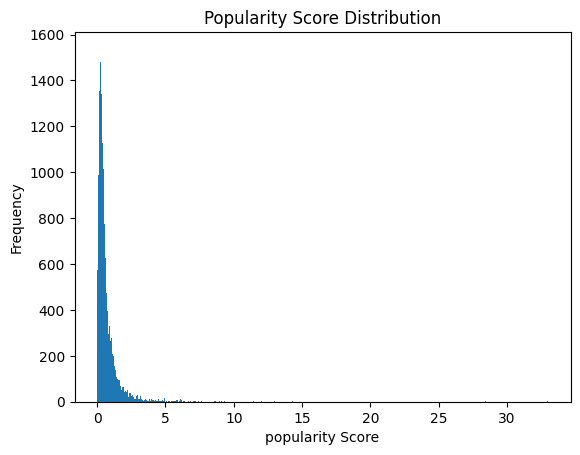

In [31]:
# Creating the bins for the histogram.
bins = np.histogram_bin_edges(df['popularity'], bins='auto')
# Ploting the histogram using the bins.
df['popularity'].plot(kind='hist', bins=bins, xlabel='popularity Score', title='Popularity Score Distribution');

We can see that the data is very skewed to the left. We will create custom bins to get a better picture.

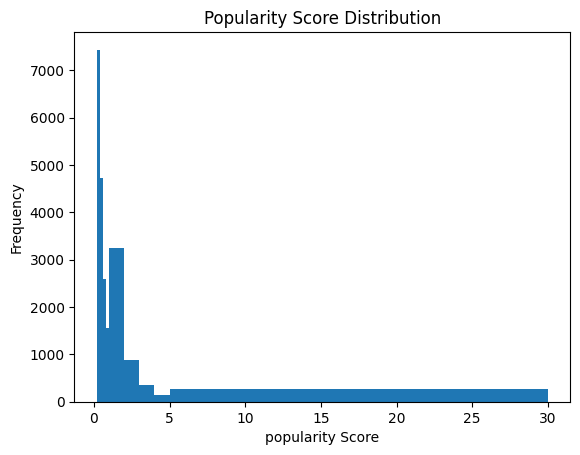

In [32]:
# Ploting the histogram using the customized bins.
df['popularity'].plot(kind='hist', bins=[0.2,0.4,0.6,0.8,1,2,3,4,5,30], xlabel='popularity Score', title='Popularity Score Distribution');

Using the custom bins we can see how much out data is skewed where most of the values are under 1.<br>
Now lets see what features affect the popularity score.

In [33]:
# Displaying the correlations between the features.
df.corr(numeric_only=True)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.007587,-0.080289,-0.049518,-0.086295,-0.020349,-0.064658,0.490787,-0.135068,-0.093005
popularity,0.007587,1.000000,0.511371,0.637505,0.143357,0.794716,0.238725,0.112197,0.475640,0.578922
budget,-0.080289,0.511371,1.000000,0.695144,0.180189,0.623277,0.091653,0.162131,0.960827,0.564662
revenue,-0.049518,0.637505,0.695144,1.000000,0.151124,0.778721,0.174014,0.090120,0.663023,0.911188
runtime,-0.086295,0.143357,0.180189,0.151124,1.000000,0.177091,0.176209,-0.135476,0.219779,0.167015
vote_count,-0.020349,0.794716,0.623277,0.778721,0.177091,1.000000,0.283662,0.132990,0.574819,0.691135
vote_average,-0.064658,0.238725,0.091653,0.174014,0.176209,0.283662,1.000000,-0.130689,0.106727,0.196289
release_year,0.490787,0.112197,0.162131,0.090120,-0.135476,0.132990,-0.130689,1.000000,0.045363,-0.046374
budget_adj,-0.135068,0.475640,0.960827,0.663023,0.219779,0.574819,0.106727,0.045363,1.000000,0.592575
revenue_adj,-0.093005,0.578922,0.564662,0.911188,0.167015,0.691135,0.196289,-0.046374,0.592575,1.000000


#### Popularity vs budget
Lets see if the budget of the movies does affect the popularity.

In [34]:
def plot_scatter(df, x, y):
    """
    Plots a scatter plot using the specified dataframe and column names for x and y.

    Parameters:
        df (DataFrame): The dataframe containing the data.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.

    Returns:
        None: Displays the scatter plot.
    """
    ax = df.plot(
        kind='scatter',
        x=x,
        y=y,
        color='red',
        alpha=0.5,
        title=f'{x.capitalize()} vs {y.capitalize()}',
        xlabel=f'{x.capitalize()}',
        ylabel=f'{y.capitalize()}'
    );

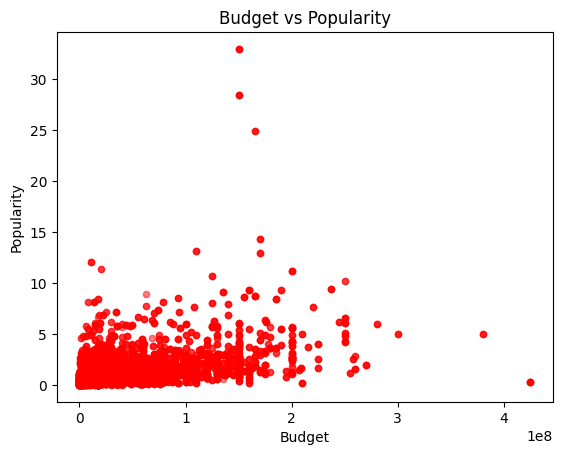

In [35]:
plot_scatter(df,'budget','popularity')

Since the correlation coefficient = 0.51 and from the scatter we can see that there is an effect of the budget on the popularity but it is not very strong.

#### popularity vs vote_count
Lets see if the vote counts for the movie correlate with the popularity

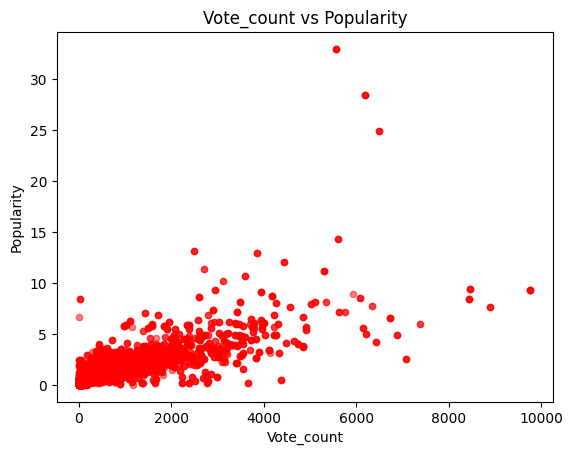

In [36]:
plot_scatter(df,'vote_count','popularity')

We can see that there is somewhat a strong correlation from the scatter grph. Also the correlation coefficient = 0.8

### Question 2: Which genres have the highest revenue.

<Axes: title={'center': 'Count of Movies in Each Genre'}, xlabel='Genre', ylabel='Number of Movies'>

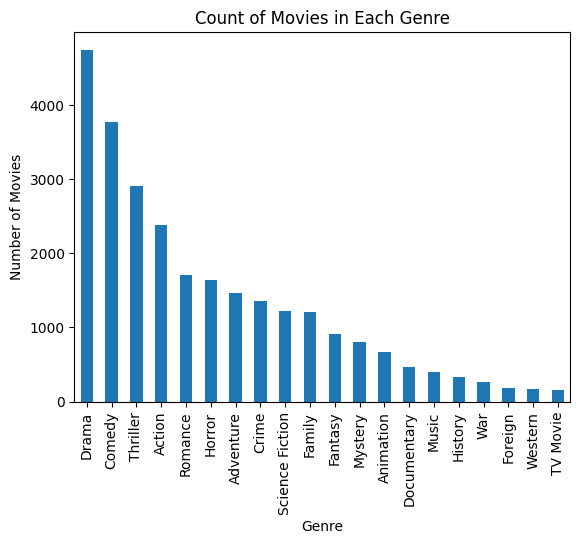

In [37]:
#Displatying all the genres.
df['genres'].value_counts().plot(kind='bar', title='Count of Movies in Each Genre', xlabel='Genre', ylabel='Number of Movies')

<Axes: title={'center': 'Revenue of each genre'}, xlabel='revenue', ylabel='genres'>

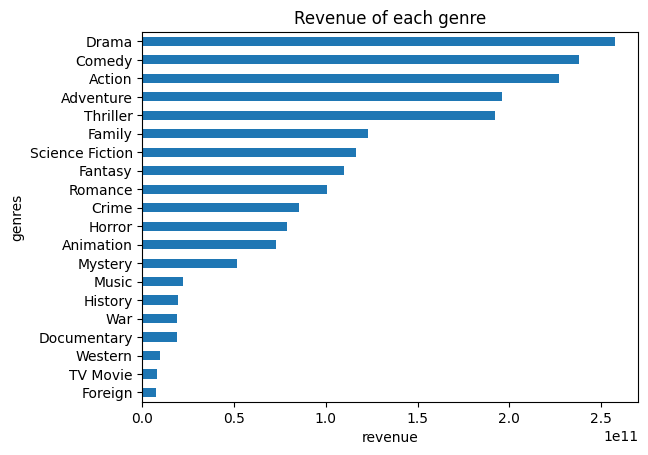

In [38]:
df.groupby(by='genres')['revenue'].sum().sort_values().plot(kind='barh', title='Revenue of each genre', xlabel='revenue')

Even that action is the fourth genre in the count of movies it has the highest revenue

<a id='conclusions'></a>
## Conclusions
1. We have explored the movies dataset to find related features to answer the question. 
2. We cleaned the data by droping columns and records and replacing inconsistent values.
3. We explored the features using EDA to find answers to the questions.

### Main findings
1. There is a small correlation between the popularity of the movie and the budget spent on it but it is not significant.
2. There is a strong correlation between the vote count and the popularity.
3. The genre with the highest revenue is action eventhough it was the fourth in the number of movies.

### Limitations 
- We only used EDA and visuals to get the correlation between features and correlation does not imply causation.
- We need to use inferential statistics and machine learning to decided on the causation and get better results.
- The dataset contains inconsistent data and a lot of missing values which affect the quality of the results.